<a href="https://colab.research.google.com/github/EmmaMills1002/skills-introduction-to-github-Emma/blob/main/SQLite_HQ_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import sqlite3
conn = sqlite3.connect('student_grades.db')
cursor = conn.cursor()

In [ ]:
conn.execute('''CREATE TABLE GRADES
(grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
student_id INTEGER NOT NULL,
subject TEXT NOT NULL,
grade INTEGER NOT NULL,
FOREIGN KEY(student_id) REFERENCES STUDENTS(student_id));''')
conn.close()

In [17]:
students_data = [
    (1, 'Alice', 'Johnson'),
    (2, 'Bob', 'Smith'),
    (3, 'Carol', 'White'),
    (4, 'David', 'Brown'),
    (5, 'Eve', 'Davis')
]
grades_data = [
    (1, 1, 'Math', 90),
    (2, 1, 'English', 88),
    (3, 1, 'History', 90),
    (4, 2, 'English', 76),
    (5, 2, 'Math', 67),
    (6, 2, 'History', 89),
    (7, 3, 'Science', 99),
    (8, 3, 'English', 90),
    (9, 3, 'History', 87),
    (10, 4, 'Math', 89),
    (11, 4, 'Science', 92),
    (12, 4, 'History', 90),
    (13, 5, 'Science', 99),
    (14, 5, 'Math', 90),
    (15, 5, 'English', 90)
]
conn.executemany('''
INSERT INTO STUDENTS (student_id, first_name, last_name)
VALUES (?, ?, ?);
''', students_data)
conn.executemany('''
INSERT INTO GRADES (grade_id, student_id, subject, grade)
VALUES (?, ?, ?, ?);
''', grades_data)
conn.commit()
conn.close()

In [33]:
query1 = '''
SELECT
  students.first_name,
  students.last_name,
  grades.subject,
  grades.grade
FROM
  students
JOIN
  grades ON students.student_id = grades.student_id;
'''
cursor.execute(query1)
results = cursor.fetchall()
for row in results:
    print(row)

('Alice', 'Johnson', 'Math', 90)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'Math', 67)
('Bob', 'Smith', 'History', 89)
('Carol', 'White', 'Science', 99)
('Carol', 'White', 'English', 90)
('Carol', 'White', 'History', 87)
('David', 'Brown', 'Math', 89)
('David', 'Brown', 'Science', 92)
('David', 'Brown', 'History', 90)
('Eve', 'Davis', 'Science', 99)
('Eve', 'Davis', 'Math', 90)
('Eve', 'Davis', 'English', 90)


In [34]:
query2 = '''
SELECT
  students.first_name,
  students.last_name,
  AVG(grades.grade) AS average_grade
FROM
  students
JOIN
  grades ON students.student_id = grades.student_id
GROUP BY
  students.student_id;
  '''
cursor.execute(query2)
results = cursor.fetchall()
for row in results:
    print(row)

('Alice', 'Johnson', 89.33333333333333)
('Bob', 'Smith', 77.33333333333333)
('Carol', 'White', 92.0)
('David', 'Brown', 90.33333333333333)
('Eve', 'Davis', 93.0)


In [36]:
query3 = '''
SELECT
  students.first_name,
  students.last_name,
  AVG(grades.grade) AS average_grade
FROM
  students
JOIN
  grades ON students.student_id = grades.student_id
GROUP BY
  students.student_id
ORDER BY
  average_grade DESC
LIMIT 1;
'''
cursor.execute(query3)
results = cursor.fetchall()
for row in results:
    print(row)

('Eve', 'Davis', 93.0)


In [37]:
query4 = '''
SELECT AVG(grade) AS average_math_grade
FROM
  grades
WHERE
  subject = 'Math';
'''
cursor.execute(query4)
results = cursor.fetchall()
for row in results:
    print(row)

(84.0,)


In [38]:
query5 = '''
SELECT
  students.first_name,
  students.last_name,
  grades.subject,
  grades.grade
FROM
  students
JOIN
  grades ON students.student_id = grades.student_id
WHERE
  grades.grade > 90;
'''
cursor.execute(query5)
results = cursor.fetchall()
for row in results:
    print(row)

('Carol', 'White', 'Science', 99)
('David', 'Brown', 'Science', 92)
('Eve', 'Davis', 'Science', 99)


In [39]:
conn.close()

In [40]:
import pandas as pd

In [43]:
students_df = pd.read_sql_query('SELECT * FROM STUDENTS', conn)
grades_df = pd.read_sql_query('SELECT * FROM GRADES', conn)

In [45]:
join_query = '''
SELECT
  students.first_name,
  students.last_name,
  grades.subject,
  grades.grade
FROM
  students
JOIN
  grades ON students.student_id = grades.student_id;
'''
combined_df = pd.read_sql_query(join_query, conn)

In [46]:
import matplotlib.pyplot as plt

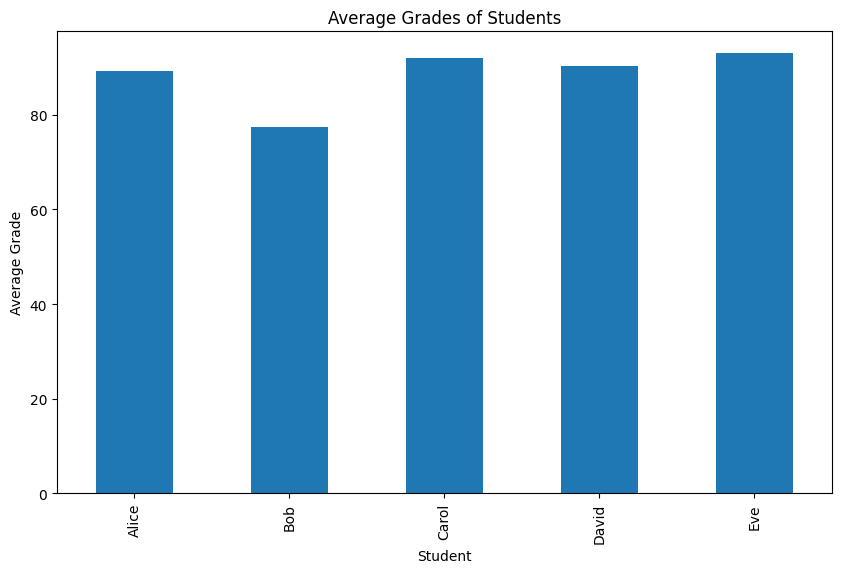

In [53]:
avg_grades_student = combined_df.groupby('first_name')['grade'].mean()
plt.figure(figsize=(10, 6))
avg_grades_student.plot(kind='bar')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grades of Students')
plt.show()

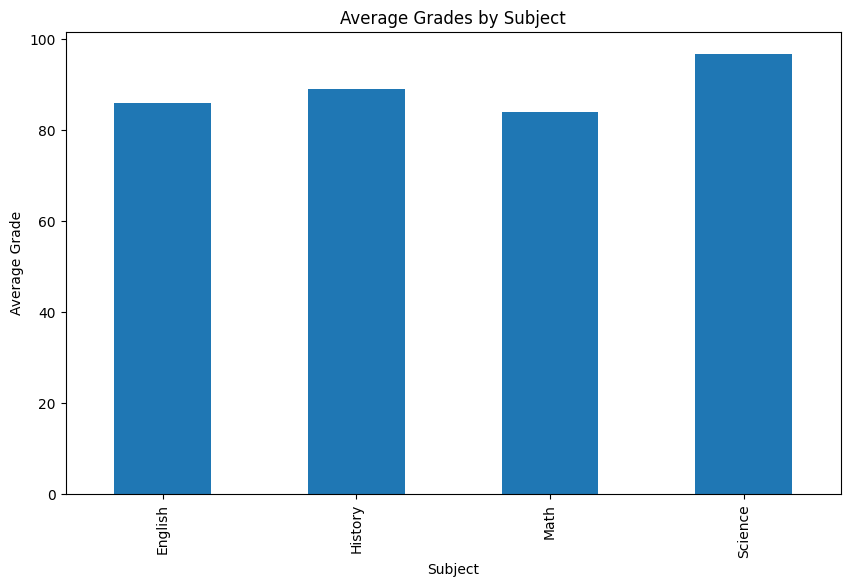

In [55]:
avg_grades_subject = combined_df.groupby('subject')['grade'].mean()
plt.figure(figsize=(10, 6))
avg_grades_subject.plot(kind='bar')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grades by Subject')
plt.show()